Análisis Exploratorio de Datos
Roberto Pérez - A01286834

# Introducción

El Titanic fue un medio de transporte que tenía el recorrido de Europa al continente americano a inicios del siglo XX. EN 1912 zarpó desde el puerto de Southhampton para luego ir a recoger más personas en los puertos de Queenstown y Cherburgo, despúes de 4 días chocó contra iceberg y se empezó a hundir. El problema principal fue que el Titanic no estaba equipado con los suficientes botes salvabvidas para todos.

En la base de datos, existe la variable de la clase, esta es la que más me llamó la atención y con la que me surgen varias dudas. ¿El dinero o el estatus les salvó la vida a los pasajeros de primera clase? ¿Aún siendo de primera clase había prioridad para las mujeres y niños?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

# Primeras filas
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
primera_clase = titanic[titanic['Pclass'] == 1]
mayores_30 = titanic.query('Age > 30')
subset = titanic[['Name', 'Age', 'Survived']]
por_edad = titanic.sort_values('Age', ascending=True)
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1
# AGRUPAR y RESUMIR (group_by + summarize en R)
por_clase = titanic.groupby('Pclass').agg({
    'Survived': 'mean',
    'Age': 'median',
    'Fare': ['mean', 'std']
})

# Contar frecuencias (count en R)
titanic['Pclass'].value_counts()

,count
Pclass,
3,491
1,216
2,184


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  FamilySize   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


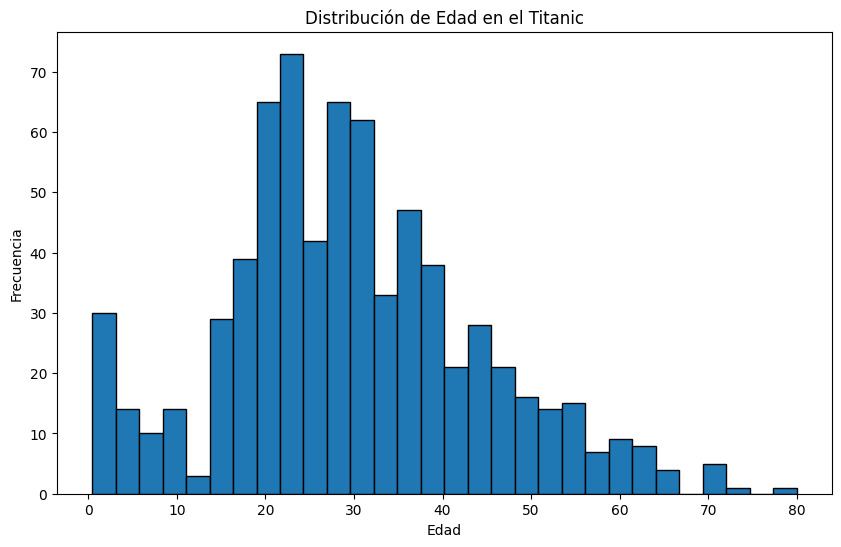

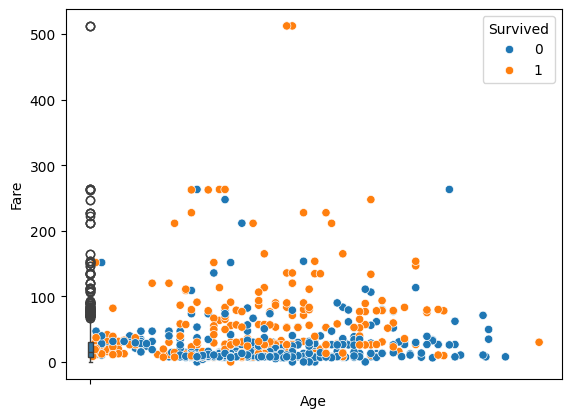

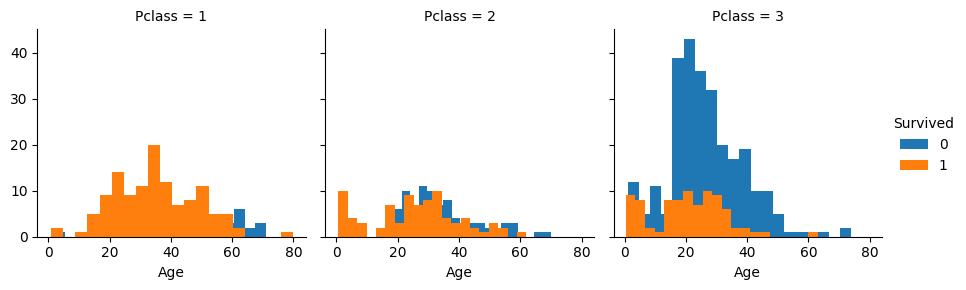

In [ ]:
# Resumen estadístico básico
titanic.describe()
titanic.info()

# Valores faltantes
titanic.isnull().sum()

# Distribución de una variable continua
plt.figure(figsize=(10, 6))
plt.hist(titanic['Age'].dropna(), bins=30, edgecolor='black')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de Edad en el Titanic')
plt.show()

# Boxplot para detectar outliers
sns.boxplot(data=titanic, y='Fare')

# Relación entre dos variables categóricas
pd.crosstab(titanic['Pclass'], titanic['Survived'], normalize='index')

# Visualización de dos variables
sns.scatterplot(data=titanic, x='Age', y='Fare', hue='Survived')

# Múltiples visualizaciones (facets en R)
g = sns.FacetGrid(titanic, col='Pclass', hue='Survived')
g.map(plt.hist, 'Age', bins=20)
g.add_legend()



Parte 1: Variación (¿Cómo varían mis datos?)


1. ¿Cuál es la distribución de el FamilySize?


2.  ¿ En qué Embarque se subió más gente? ¿ El embarque depende de la clase?



3. ¿Las cantidad de personas jovenes es igual entre mujeres y hombres?

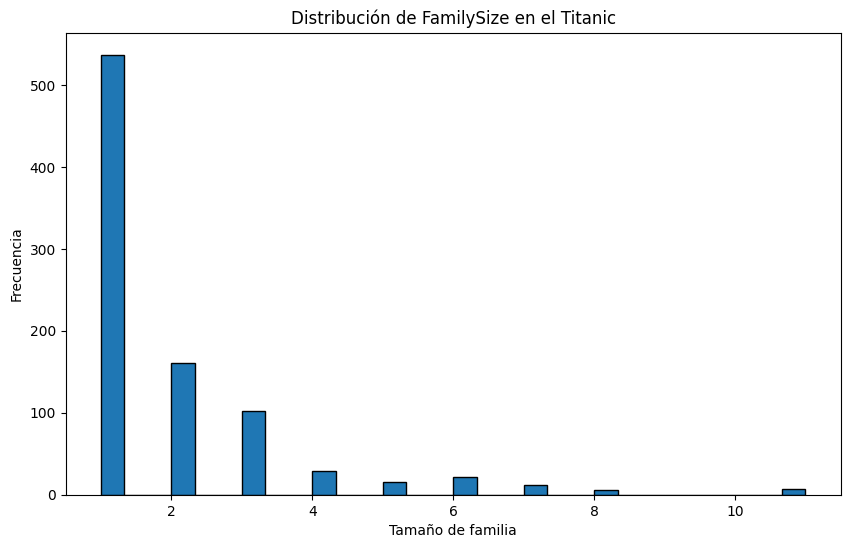

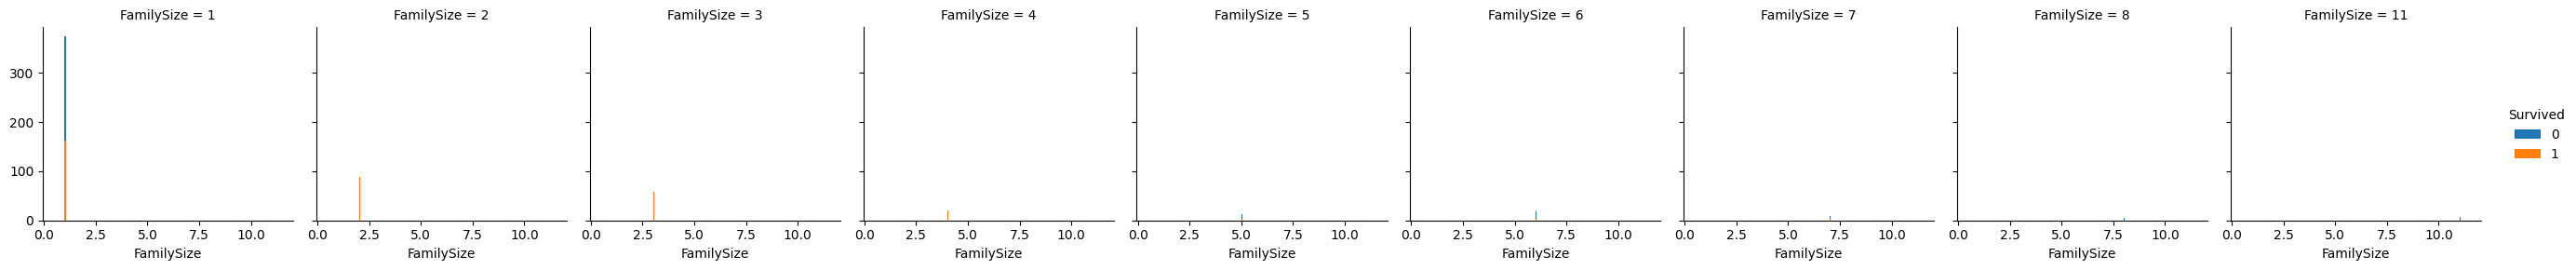

In [ ]:
# 1. ¿Cuál es la distribución de el FamilySize?


titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1
plt.figure(figsize=(10, 6))
plt.hist(titanic['FamilySize'].dropna(), bins=30, edgecolor='black')
plt.xlabel('Tamaño de familia')
plt.ylabel('Frecuencia')
plt.title('Distribución de FamilySize en el Titanic')
plt.show()


g = sns.FacetGrid(titanic, col='FamilySize', hue='Survived')
g.map(plt.hist, 'FamilySize', bins=20)
g.add_legend()



En el histograma, se aprecía que mayoría de los pasajeros viajaban individualmente, siguiendo una tendencia de decrecimiento. Es decir, entre más grande la familia, menos familias. Se aprecia un valor atípico de una familia de 11 integrantes.

Mi hipótesis de porque la mayoría de la genta viajó individualmente o en parejas en el Titanic, es porque este era visto como un medio de transporte de lujo, aun en clase baja, los precios eran elevados. En ese momento había muchas emigraciones familiares de Europa a America, pero probablemente no hayan hecho uso de medios como el Titanic, si no, opciones más economicas. Por esto, principalmente gente que iba en el Titanic viajaba individualmente, porque el Titanic era lujo y por ende tenía los precios elevados. Por eso la gente viajaba sola, quizá en cuestiones de negocios.

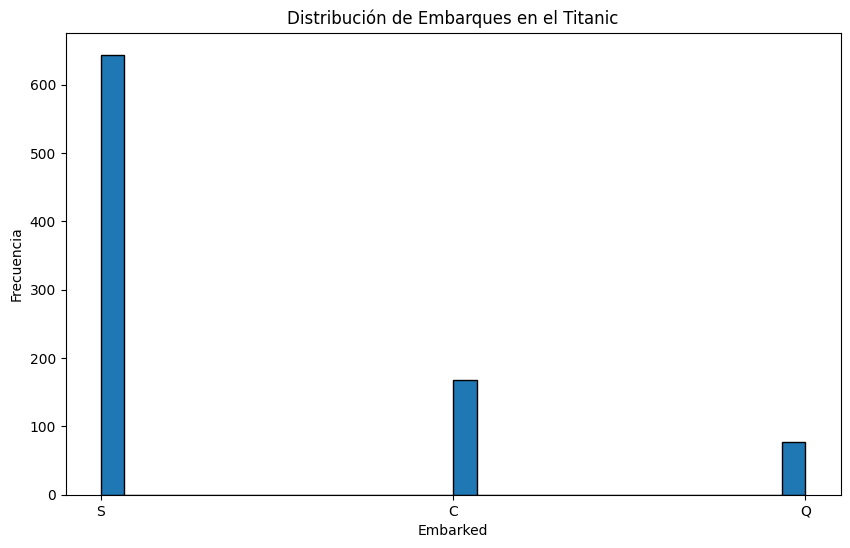

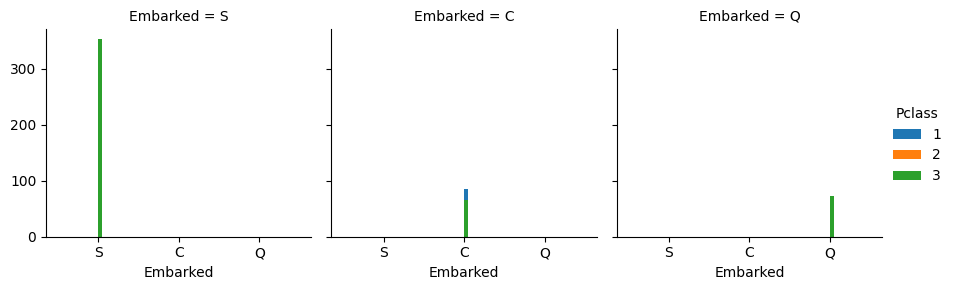

In [ ]:


#2. ¿ En qué Embarque se subió más gente? ¿ El embarque depende de la clase?


titanic['Embarked'].value_counts()
plt.figure(figsize=(10, 6))
plt.hist(titanic['Embarked'].dropna(), bins=30, edgecolor='black')
plt.xlabel('Embarked')
plt.ylabel('Frecuencia')
plt.title('Distribución de Embarques en el Titanic')
plt.show()

g = sns.FacetGrid(titanic, col='Embarked', hue='Pclass')
g.map(plt.hist, 'Embarked', bins=20)
g.add_legend()


In [ ]:

porcient_de_pclass_puerto = titanic.groupby('Embarked')['Pclass'].value_counts(normalize=True).mul(100).unstack(fill_value=0)

print("Porcentaje de cada clase por puerto de embarque:")
print(porcient_de_pclass_puerto)


Porcentaje de cada clase por puerto de embarque:
Pclass            1          2          3
Embarked                                 
C         50.595238  10.119048  39.285714
Q          2.597403   3.896104  93.506494
S         19.720497  25.465839  54.813665


Este histograma resultó interesante, por la gran predominanción de la gente que embarcó en el puerto S, mientras que la minoría en el puerto Q. Adicionalmente se notó que el puerto en que se embarcó no tiene que ver con la clase. En todos los puntos de embarque predomina la clase 3. Desconozco la razón histórica por la que más gente abordó en el puerto S, pero probablmente haya sido un mejor punto estratégico, en el sentido de que era un puerto más grande o mejor ubicado.

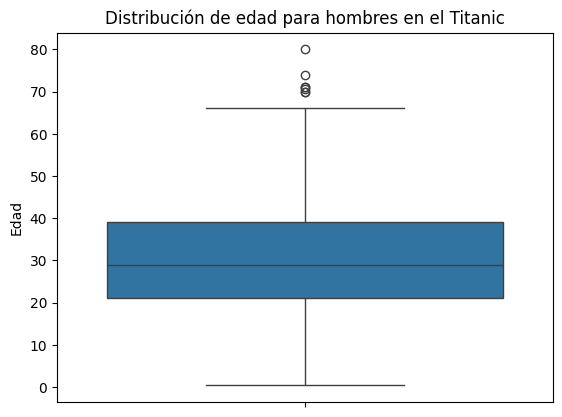

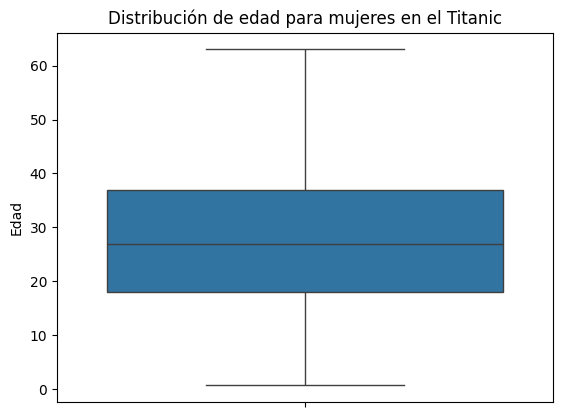

<class 'pandas.core.frame.DataFrame'>
Index: 577 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  577 non-null    int64  
 1   Survived     577 non-null    int64  
 2   Pclass       577 non-null    int64  
 3   Name         577 non-null    object 
 4   Sex          577 non-null    object 
 5   Age          453 non-null    float64
 6   SibSp        577 non-null    int64  
 7   Parch        577 non-null    int64  
 8   Ticket       577 non-null    object 
 9   Fare         577 non-null    float64
 10  Cabin        107 non-null    object 
 11  Embarked     577 non-null    object 
 12  FamilySize   577 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 63.1+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 314 entries, 1 to 888
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  314 n

In [ ]:
#3. ¿Las cantidad de personas jovenes es igual entre mujeres y hombres?




male_titanic = titanic[titanic['Sex'] == 'male']
sns.boxplot(data=male_titanic, y='Age')
plt.title('Distribución de edad para hombres en el Titanic')
plt.ylabel('Edad')
plt.show()

female_titanic = titanic[titanic['Sex'] == 'female']
sns.boxplot(data=female_titanic, y='Age')
plt.title('Distribución de edad para mujeres en el Titanic')
plt.ylabel('Edad')
plt.show()


male_titanic['Age'].value_counts()

male_titanic.info()
female_titanic.info()

Estos boxplots son muy interesantes porque nos muestran las diferencias entre las distribuciones de edad de los dos sexos. Se observa que hay un menor rango de edad en el caso de las mujeres, mientras que en los hombres hasta existen valores atípicos que salen del rango. Cabe recalcar que no existe la misma cantidad de hombres y mujeres, dado que hay 577 hombres pero solo 314 mujeres.

Mi hipótesis, considerando el contexto de la época es que las mujeres eran más que nada esposas o acompañantes de hombres, dado que en esa epoca había roles más fijos sobre los labores y deberes de los distintos sexos, así que de esta manera había menos mujeres trabajando y con la oportunidad de costearse un boleto en el titanic que era un medio de transporte de lujo.



Parte 2: Covariación (¿Cómo se relacionan las variables?)

1. ¿Cuál es la relación entre supervivencia y el embarque en el que subieron?

2. ¿En la clase baja sobrevivieron más las mujeres que los hombres?

3. ¿Los individuos jovenes ( menor a 35 años) que viajaban solos tenían menor probabilidad de sobrevivir?



Porcentaje de supervivencia por punto de embarque:
Embarked
C    55.357143
Q    38.961039
S    33.695652
Name: Survived, dtype: float64


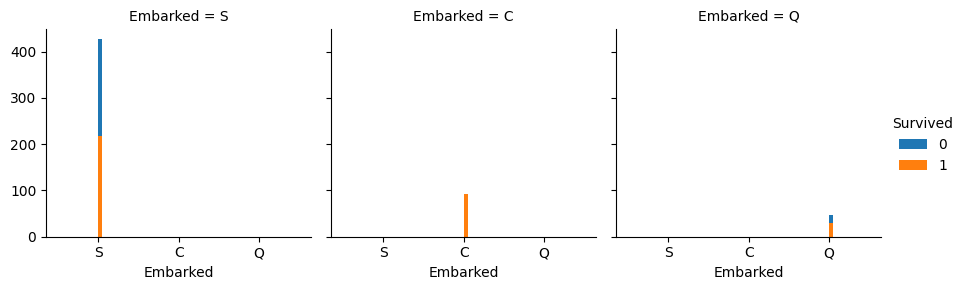

In [ ]:
#1. ¿Cuál es la relación entre supervivencia y el embarque en el que subieron?

g = sns.FacetGrid(titanic, col='Embarked', hue='Survived')
g.map(plt.hist, 'Embarked', bins=20)
g.add_legend()

survival_by_embarkation = titanic.groupby('Embarked')['Survived'].mean() * 100
print("Porcentaje de supervivencia por punto de embarque:")
print(survival_by_embarkation)

/tmp/ipython-input-2214573994.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_by_embarkation.index, y=survival_by_embarkation.values, palette='viridis')


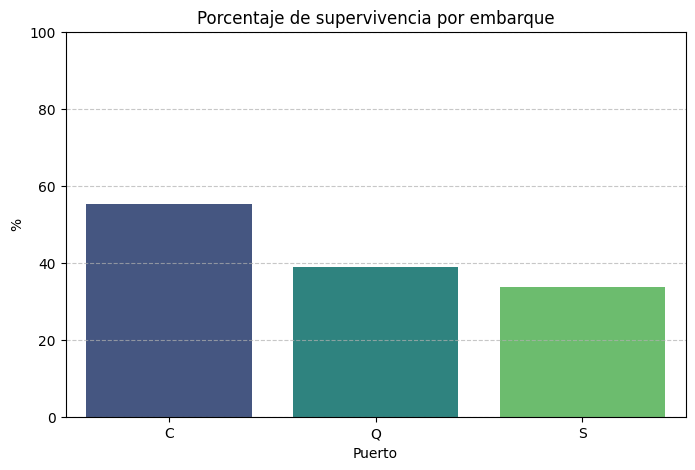

Porcentaje de cada clase por puerto de embarque:
Pclass            1          2          3
Embarked                                 
C         50.595238  10.119048  39.285714
Q          2.597403   3.896104  93.506494
S         19.720497  25.465839  54.813665


In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x=survival_by_embarkation.index, y=survival_by_embarkation.values, palette='viridis')
plt.title('Porcentaje de supervivencia por embarque')
plt.xlabel('Puerto')
plt.ylabel('%')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


porcient_de_pclass_puerto = titanic.groupby('Embarked')['Pclass'].value_counts(normalize=True).mul(100).unstack(fill_value=0)

print("Porcentaje de cada clase por puerto de embarque:")
print(porcient_de_pclass_puerto)

Se observa que el embarque en el puerto C, predominaba la primera clase y existe asimismo la relación que los del puerto C fueron los más probables a sobrevivir (aprox 55%). Esto tiene sentido al observar que hay una proporción de más de 50% de pasajeros de primera clase en este punto de embarque. Mientras que en los otros puertos donde la primera clase era una minoría, ya no se observo esta tendencia. El contexto en este caso fue que se le dió amplia y extensa prioridad a los pasajeros de primera clase mucho antes que a los de 3era o 2nda clase.

Porcentaje de supervivencia en clase 3 por género:
Sex
female    96.808511
male      36.885246
Name: Survived, dtype: float64


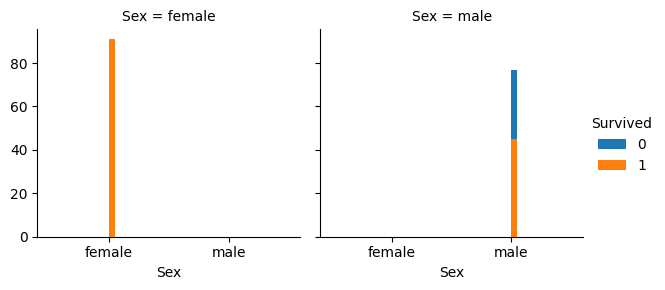

In [ ]:
# 2.¿En la clase alta sobrevivieron más las mujeres que los hombres?

class1_titanic = titanic[titanic['Pclass'] == 1]

g = sns.FacetGrid(class1_titanic, col='Sex', hue='Survived')
g.map(plt.hist, 'Sex', bins=20)
g.add_legend()

sobrevivencia_de_sexo_pclass3 = class1_titanic.groupby('Sex')['Survived'].mean() * 100
print("Porcentaje de supervivencia en clase 3 por género:")
print(sobrevivencia_de_sexo_pclass3)

Esto sí es impactante, ver que en la clase alta, sobrevivieron casi todas las mujeres abordo (casi 97%) sin lugar a dudas por un protocolo de mujeres y niños primero, donde se les dió prioridad a estos grupos demográficos. Además de que por ser primera clase tambien se les otorgo privilegio de subirse antes. Por otro lado, en primera clase los hombres fueron casi 3 veces más probables de sobrevivir que en 3era clase. Dado que en tercera clase los hombres tneian un prrcentaje de 13.5% mientras que 1era un 36.9%.

In [ ]:
#3. ¿Los individuos jovenes ( menor a 35 años) que viajaban solos tenían mayor probabilidad de sobrevivir?

jovenes_solos_titanic = titanic[(titanic['Age']<=35) & (titanic['FamilySize'] == 1)]

probabilidad_supervivencia_jovenes_solos = jovenes_solos_titanic['Survived'].mean() * 100
print(f"Probabilidad de supervivencia para jóvenes (<=35 años) que viajaban solos: {probabilidad_supervivencia_jovenes_solos:.2f}%")

jovenes_pareja_titanic = titanic[(titanic['Age']<=35) & (titanic['FamilySize'] == 2)]

probabilidad_supervivencia_jovenes_solos = jovenes_pareja_titanic['Survived'].mean() * 100
print(f"Probabilidad de supervivencia para jóvenes (<=35 años) que viajaban en pareja: {probabilidad_supervivencia_jovenes_solos:.2f}%")

jovenes_pareja_trio = titanic[(titanic['Age']<=35) & (titanic['FamilySize'] == 3)]

probabilidad_supervivencia_jovenes_solos = jovenes_pareja_trio['Survived'].mean() * 100
print(f"Probabilidad de supervivencia para jóvenes (<=35 años) que viajaban en 3: {probabilidad_supervivencia_jovenes_solos:.2f}%")

jovenes_pareja_cuatro = titanic[(titanic['Age']<=35) & (titanic['FamilySize'] == 4)]

probabilidad_supervivencia_jovenes_solos = jovenes_pareja_cuatro['Survived'].mean() * 100
print(f"Probabilidad de supervivencia para jóvenes (<=35 años) que viajaban en 3: {probabilidad_supervivencia_jovenes_solos:.2f}%")



probabilidad_supervivencia_general = titanic['Survived'].mean() * 100
print(f"Probabilidad de supervivencia general en el Titanic: {probabilidad_supervivencia_general:.2f}%")

Probabilidad de supervivencia para jóvenes (<=35 años) que viajaban solos: 33.21%
Probabilidad de supervivencia para jóvenes (<=35 años) que viajaban en pareja: 55.06%
Probabilidad de supervivencia para jóvenes (<=35 años) que viajaban en 3: 60.00%
Probabilidad de supervivencia para jóvenes (<=35 años) que viajaban en 3: 78.26%
Probabilidad de supervivencia general en el Titanic: 38.38%


/tmp/ipython-input-1371607700.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Grupo', y= 'Probabilidad de Supervivencia (%)', data=df_plot, palette='viridis')


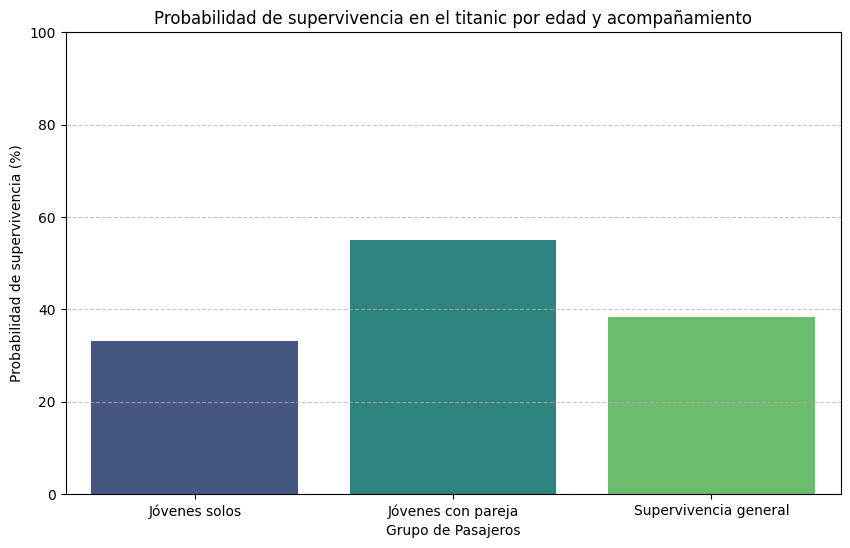

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

probabilidad_supervivencia_jovenes_solos = titanic[(titanic['Age']<=35) & (titanic['FamilySize'] == 1)]['Survived'].mean() * 100
probabilidad_supervivencia_jovenes_pareja = titanic[(titanic['Age']<=35) & (titanic['FamilySize'] == 2)]['Survived'].mean() * 100
probabilidad_supervivencia_general = titanic['Survived'].mean() * 100


data = {
    'Grupo': ['Jóvenes solos', 'Jóvenes con pareja', 'Supervivencia general'],
    'Probabilidad de Supervivencia (%)': [
        probabilidad_supervivencia_jovenes_solos,
        probabilidad_supervivencia_jovenes_pareja,
        probabilidad_supervivencia_general
    ]
}
df_plot = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
sns.barplot(x='Grupo', y= 'Probabilidad de Supervivencia (%)', data=df_plot, palette='viridis')
plt.title('Probabilidad de supervivencia en el titanic por edad y acompañamiento')
plt.xlabel('Grupo de Pasajeros')
plt.ylabel('Probabilidad de supervivencia (%)')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Esta relación fue mi favorita, porque me puse a jugar con los filtros y me impresiono darme cuenta los jovenes que iban solos a pesar de ser jovenes, la mayoría no sobrevivió más que el promedio. Pero los jovenes que iban acompañados de una persona más tuvieron una probabilidad del 55.1% de sobrevivir. Probablemente debido a que iban acompañados de mujeres y estas recibieron el trato preferencial y porque los jovenes solos fueron serviciales y permitieron que las parejas y las mujeres subieran primero.

Parte 3: Valores Faltantes

<Axes: >

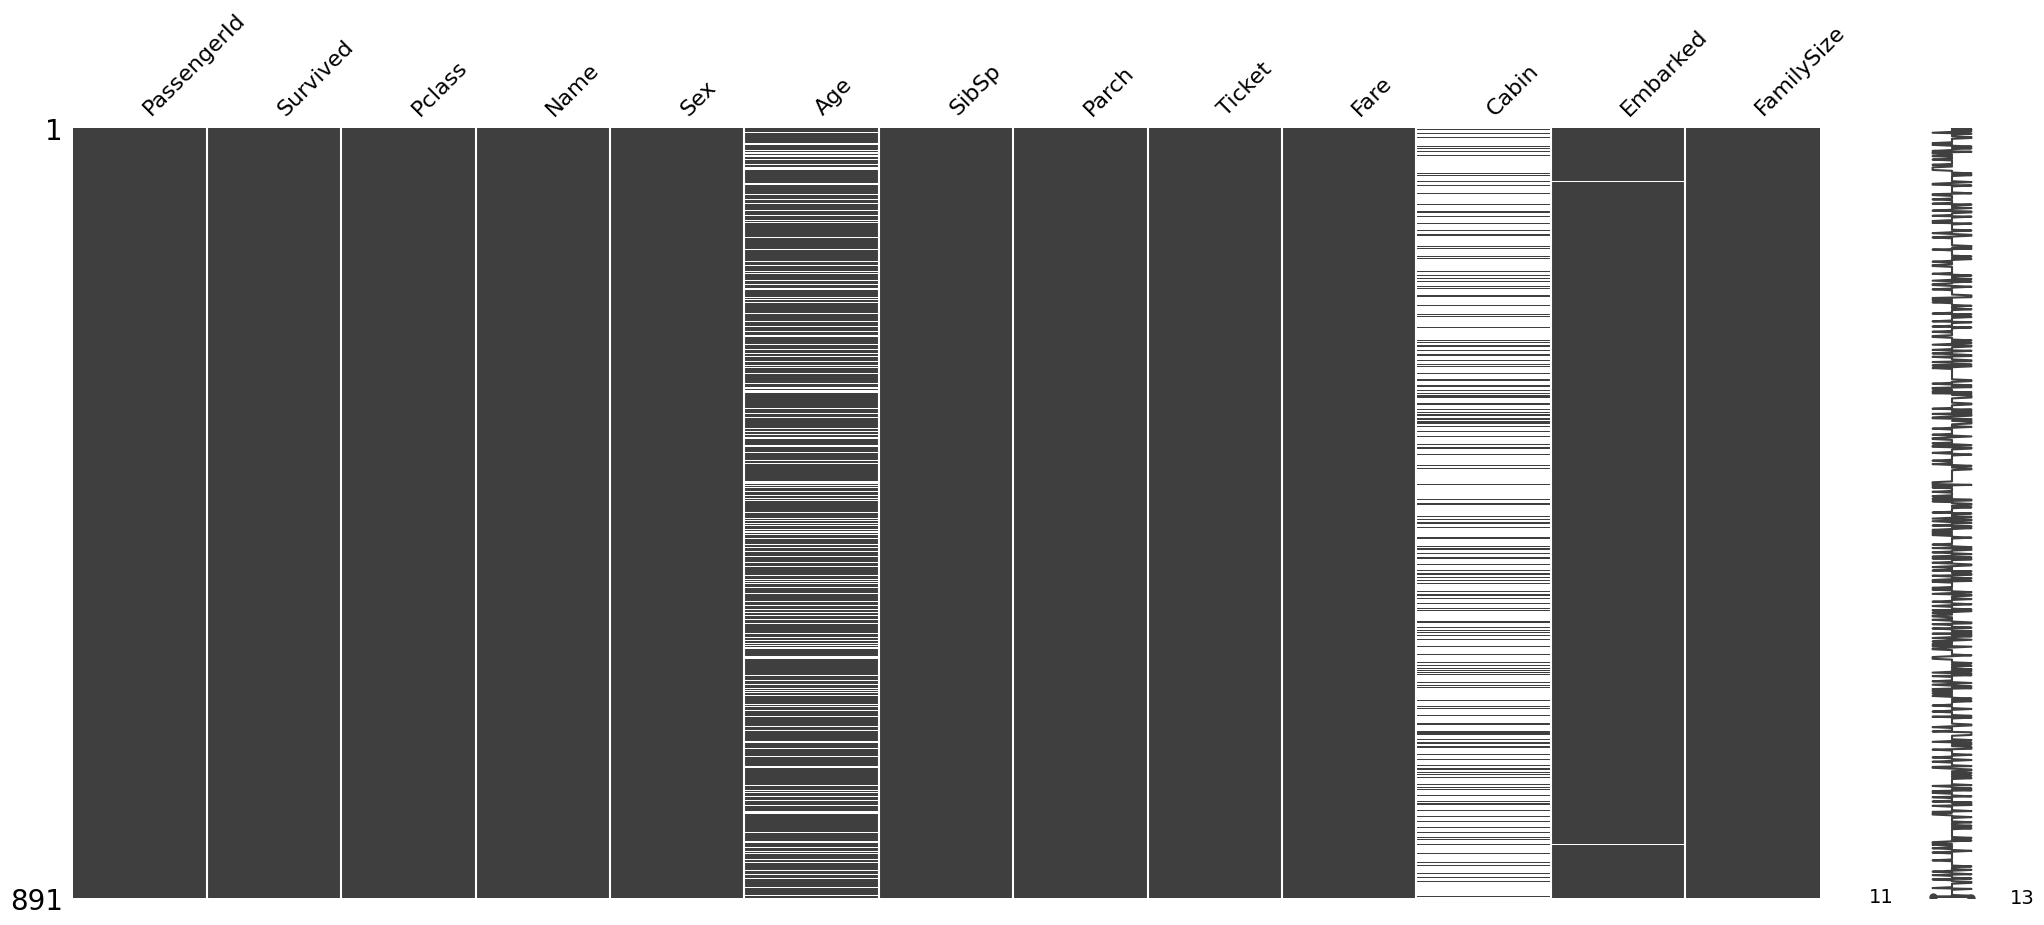

In [ ]:
# Inspeccionar valores faltantes
titanic.isnull().sum()

# Visualizar patrón de valores faltantes
import missingno as msno  # pip install missingno
msno.matrix(titanic)

¿Qué variables tienen valores faltantes? Principalmente Age y Cabin
¿Los valores faltantes son aleatorios o siguen un patrón? (ej: ¿la edad faltante está relacionada con la clase del pasajero?) Son aleatorios

¿Cómo manejarían estos valores faltantes? Justifiquen su respuesta.

Probablemnte la mayoría de las veces ignoraría estos datos sin valor dado que es dificil que me aporten algo si estoy trabajando con la edad o la cabina. Pero si tengo tiempo, ya aprendimos a hacer modelos predictivos simples, así que tendría que hacerle upscale a un modelo para que según la información que si tenemos ( sexo, clase, supervivencia, etc..) arrojé un valor predicted para estos pasajeros sin la edad o cabina. Entonces podría usar estos datos, pero siempre con la consciencia del margen de error del modelo y de la inexactitud.

Parte 4: Una Pregunta Propia


# **¿En qué medida el hecho de ser un jóven acompañado incrementaba las probabilidades de supervivencia?**

# Planteamiento
Tras andar jugando con estas variables me impacto que el hecho de ir acompañado incrementaba ampliamente las probabilidades de sobrevivir. Además aunado a que en la parte 1 investigue la distribución de sobrevivencia según el FamilySize y me sorprendió que había un sweet spot donde si sobrevivian pero el hecho de estar solos o ser muchos implicaba una menor probabilidad, entonces quería ver hasta que punto conviene estar acompañado para poder sobrevivir. Por otro lado, se agrega la variable de la juventud, dado que este grupo demográfico era el más propenso a sobrevivir.


Únicamente se tomarón en cuenta familias de hasta máximo 7 integrantes dado que el resto de los valores son atipicos y no en todas se tiene valores. Por otro lado, se me hizo interesante trabajar con las edades de los pasajeros encontré que aproximadamente la mitad de los pasajeros tenian 28 o menos, y por ende la otra mitad eran los de 28 para arriba. Se me hizo interesante analizar la diferencia entre este corte de edad, para ver si convenía ser de la mitad más jóven o la mitad más adulta para aumentar mis probabilidades de sobrevivencia.

# Resolución y Hallazgos

Con el propósito de poder responder esta pregunta hicé varias consultas descriptivas para mejor conover las variables y entender ciertos patrones y porcentajes.

Seguido de esto, ya conocí el porcentaje de supervivencia dependiendo del grupo de edad y el acompañamiento. Esto lo demostré por medio de dos histogramas y resultó que estar acompañado aumenta significativamente las probabilidades de sobrevivir, pero solo hasta cierto punto, dado que en grupos de 4 personas se presenta la mayor probabilidad de sobrevivir tanto en jovenes como en los mayores; 75% y 86% respectivamente. Sin embargo, después de 4 personas el patrón desaparece. Es decir, quedá confirmado que viajar solo no es una buena opción, pero si llevabas un acompañante tus probabibilidades aumentaban, si traías a 2 acompañantes seguía aumentando y si llevabas a 3 acompañantes este era el punto óptimo para asegurar la supervivencia. Pero a partir de 4 acompañantes, las probabilidades de supervivencia son iguales o inferiores a viajar solo. Y este patrón de decrecimiento se ve presente en los siguiente grupos con familias más grandes.


Asímismo se notó una tendencia entre ambos histogramas en las proporciones de supervivencia según el FamilySize, es decir, a pesar de en que mitad de edad estabas, las probabilidades de sobrevivir dependiendo del número de acompañantes seguían un mismo patrón, quizá en ciertos grupos con ligeras mejores probabilidades, pero nada significante. Es decir, que a pesar de que se siguió un protocolo de niños primero, la mitad más jóven no tuvo una probabilidad muy significativa de sobrevivir a comparación de la mitad más grande, debido a que muchos individuos de la mitad más jóven eran de la 3era clase, ( menores probabilidades de sobrevivir)  

La probabilidad general de sobrevivir si eras de la mitad más jóven era de 40.88% mientras que si eras de la otra mitad 40.34%. Esta diferencia es realmente insignificante, por lo que, en este corte de edad en este analísis la edad no es un factor influyente para determinar la supervivencia. Pero el hecho de estar acompñado por 3 acompañantes era lo que daba una probabilidad más alta de superviviencia.

In [ ]:
total_passengers_with_age = titanic['Age'].count()
passengers_28_and_older = titanic[titanic['Age'] >28]['Age'].count()

percentage_28_and_older = (passengers_28_and_older / total_passengers_with_age) * 100

print(f"El porcentaje de personas de 28 años o más es: {percentage_28_and_older:.2f}%")

El porcentaje de personas de 28 años o más es: 49.30%


In [ ]:
jovenes_solos_titanic = titanic[(titanic['Age']<=28) & (titanic['FamilySize'] == 1)]

probabilidad_supervivencia_jovenes_solos = jovenes_solos_titanic['Survived'].mean() * 100
print(f"Probabilidad de supervivencia para jóvenes (<=28 años) que viajaban solos: {probabilidad_supervivencia_jovenes_solos:.2f}%")

jovenes_pareja_titanic = titanic[(titanic['Age']<=28) & (titanic['FamilySize'] == 2)]

probabilidad_supervivencia_jovenes_solos = jovenes_pareja_titanic['Survived'].mean() * 100
print(f"Probabilidad de supervivencia para jóvenes (<=28 años) que viajaban en pareja: {probabilidad_supervivencia_jovenes_solos:.2f}%")

jovenes_pareja_trio = titanic[(titanic['Age']<=28) & (titanic['FamilySize'] == 3)]

probabilidad_supervivencia_jovenes_solos = jovenes_pareja_trio['Survived'].mean() * 100
print(f"Probabilidad de supervivencia para jóvenes (<=28 años) que viajaban en 3: {probabilidad_supervivencia_jovenes_solos:.2f}%")

jovenes_pareja_cuatro = titanic[(titanic['Age']<=28) & (titanic['FamilySize'] == 4)]

probabilidad_supervivencia_jovenes_solos = jovenes_pareja_cuatro['Survived'].mean() * 100
print(f"Probabilidad de supervivencia para jóvenes (<=28 años) que viajaban en 4: {probabilidad_supervivencia_jovenes_solos:.2f}%")

jovenes_pareja_cinco = titanic[(titanic['Age']<=28) & (titanic['FamilySize'] == 5)]

probabilidad_supervivencia_jovenes_solos = jovenes_pareja_cinco['Survived'].mean() * 100
print(f"Probabilidad de supervivencia para jóvenes (<=28 años) que viajaban en 5: {probabilidad_supervivencia_jovenes_solos:.2f}%")

jovenes_pareja_6 = titanic[(titanic['Age']<=28) & (titanic['FamilySize'] == 6)]

probabilidad_supervivencia_jovenes_solos = jovenes_pareja_6['Survived'].mean() * 100
print(f"Probabilidad de supervivencia para jóvenes (<=28 años) que viajaban en 6: {probabilidad_supervivencia_jovenes_solos:.2f}%")

jovenes_pareja_7 = titanic[(titanic['Age']<=28) & (titanic['FamilySize'] == 7)]

probabilidad_supervivencia_jovenes_solos = jovenes_pareja_7['Survived'].mean() * 100
print(f"Probabilidad de supervivencia para jóvenes (<=28 años) que viajaban en 7: {probabilidad_supervivencia_jovenes_solos:.2f}%")


probabilidad_supervivencia_general = titanic['Survived'].mean() * 100
print(f"Probabilidad de supervivencia general en el Titanic: {probabilidad_supervivencia_general:.2f}%")

Probabilidad de supervivencia para jóvenes (<=35 años) que viajaban solos: 29.63%
Probabilidad de supervivencia para jóvenes (<=35 años) que viajaban en pareja: 57.81%
Probabilidad de supervivencia para jóvenes (<=35 años) que viajaban en 3: 64.00%
Probabilidad de supervivencia para jóvenes (<=35 años) que viajaban en 4: 75.00%
Probabilidad de supervivencia para jóvenes (<=35 años) que viajaban en 5: 25.00%
Probabilidad de supervivencia para jóvenes (<=35 años) que viajaban en 6: 17.65%
Probabilidad de supervivencia para jóvenes (<=35 años) que viajaban en 7: 33.33%
Probabilidad de supervivencia general en el Titanic: 38.38%


In [ ]:
mayores_solos_titanic = titanic[(titanic['Age']>28) & (titanic['FamilySize'] == 1)]

probabilidad_supervivencia_jovenes_solos = mayores_solos_titanic['Survived'].mean() * 100
print(f"Probabilidad de supervivencia para mayores (>28 años) que viajaban solos: {probabilidad_supervivencia_jovenes_solos:.2f}%")

mayores_pareja_titanic = titanic[(titanic['Age']>28) & (titanic['FamilySize'] == 2)]

probabilidad_supervivencia_jovenes_solos = mayores_pareja_titanic['Survived'].mean() * 100
print(f"Probabilidad de supervivencia para mayores (>28 años) que viajaban en pareja: {probabilidad_supervivencia_jovenes_solos:.2f}%")

mayores_pareja_trio = titanic[(titanic['Age']>28) & (titanic['FamilySize'] == 3)]

probabilidad_supervivencia_jovenes_solos = mayores_pareja_trio['Survived'].mean() * 100
print(f"Probabilidad de supervivencia para mayores (>28 años) que viajaban en 3: {probabilidad_supervivencia_jovenes_solos:.2f}%")

mayores_pareja_cuatro = titanic[(titanic['Age']>28) & (titanic['FamilySize'] == 4)]

probabilidad_supervivencia_jovenes_solos = mayores_pareja_cuatro['Survived'].mean() * 100
print(f"Probabilidad de supervivencia para mayores (>28 años) que viajaban en 4: {probabilidad_supervivencia_jovenes_solos:.2f}%")

mayores_pareja_cinco = titanic[(titanic['Age']>28) & (titanic['FamilySize'] == 5)]

probabilidad_supervivencia_jovenes_solos = mayores_pareja_cinco['Survived'].mean() * 100
print(f"Probabilidad de supervivencia para mayores (>28 años) que viajaban en 5: {probabilidad_supervivencia_jovenes_solos:.2f}%")

mayores_pareja_6 = titanic[(titanic['Age']>28) & (titanic['FamilySize'] == 6)]

probabilidad_supervivencia_jovenes_solos = mayores_pareja_6['Survived'].mean() * 100
print(f"Probabilidad de supervivencia para mayores (>28 años) que viajaban en 6: {probabilidad_supervivencia_jovenes_solos:.2f}%")

mayores_pareja_7 = titanic[(titanic['Age']>28) & (titanic['FamilySize'] == 7)]

probabilidad_supervivencia_jovenes_solos = mayores_pareja_7['Survived'].mean() * 100
print(f"Probabilidad de supervivencia para mayores (>28 años) que viajaban en 7: {probabilidad_supervivencia_jovenes_solos:.2f}%")


probabilidad_supervivencia_general = titanic['Survived'].mean() * 100
print(f"Probabilidad de supervivencia general en el Titanic: {probabilidad_supervivencia_general:.2f}%")

Probabilidad de supervivencia para mayores (>28 años) que viajaban solos: 34.42%
Probabilidad de supervivencia para mayores (>28 años) que viajaban en pareja: 52.00%
Probabilidad de supervivencia para mayores (>28 años) que viajaban en 3: 48.84%
Probabilidad de supervivencia para mayores (>28 años) que viajaban en 4: 85.71%
Probabilidad de supervivencia para mayores (>28 años) que viajaban en 5: 33.33%
Probabilidad de supervivencia para mayores (>28 años) que viajaban en 6: 0.00%
Probabilidad de supervivencia para mayores (>28 años) que viajaban en 7: 33.33%
Probabilidad de supervivencia general en el Titanic: 38.38%


/tmp/ipython-input-1298613196.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Grupo', y='Probabilidad de Supervivencia (%)', data=df_plot, palette='viridis')


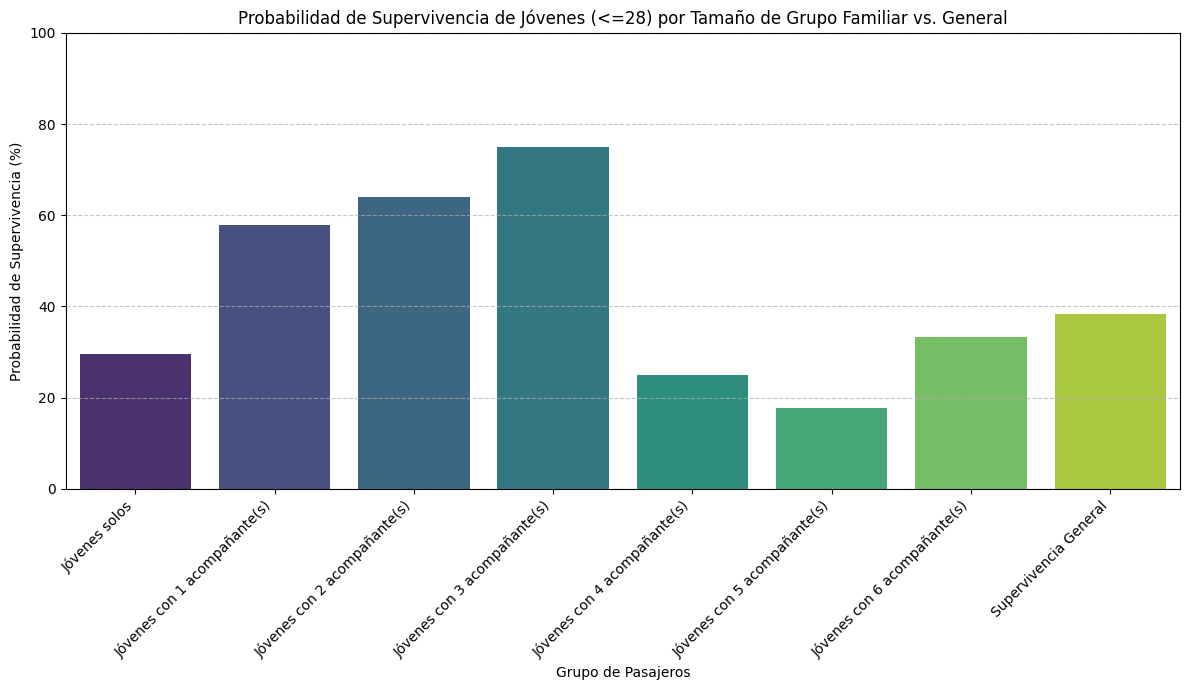

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1

young_data = titanic[titanic['Age'] <= 28]


plot_data = []


prob_solo = young_data[young_data['FamilySize'] == 1]['Survived'].mean() * 100
plot_data.append({'Grupo': 'Jóvenes solos', 'Probabilidad de Supervivencia (%)': prob_solo})


for fs in range(2, 8): # solo las familias de hasta 7 prq despues son outliers y no hay data para todos
    prob_family = young_data[young_data['FamilySize'] == fs]['Survived'].mean() * 100
    plot_data.append({'Grupo': f'Jóvenes con {fs-1} acompañante(s)', 'Probabilidad de Supervivencia (%)': prob_family})


prob_general = titanic['Survived'].mean() * 100
plot_data.append({'Grupo': 'Supervivencia General', 'Probabilidad de Supervivencia (%)': prob_general})


df_plot = pd.DataFrame(plot_data)

# Sort por 'FamilySize'
sorting_order = [f'Jóvenes solos'] + [f'Jóvenes con {i} acompañante(s)' for i in range(1, 7)] + ['Supervivencia General']
df_plot['Grupo'] = pd.Categorical(df_plot['Grupo'], categories=sorting_order, ordered=True)
df_plot = df_plot.sort_values('Grupo')

plt.figure(figsize=(12, 7))
sns.barplot(x='Grupo', y='Probabilidad de Supervivencia (%)', data=df_plot, palette='viridis')
plt.title('Probabilidad de Supervivencia de Jóvenes (<=28) por Tamaño de Grupo Familiar vs. General')
plt.xlabel('Grupo de Pasajeros')
plt.ylabel('Probabilidad de Supervivencia (%)')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right') # para que se lea bien
plt.tight_layout()
plt.show()


/tmp/ipython-input-942757859.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Grupo', y='Probabilidad de Supervivencia (%)', data=df_plot, palette='viridis')


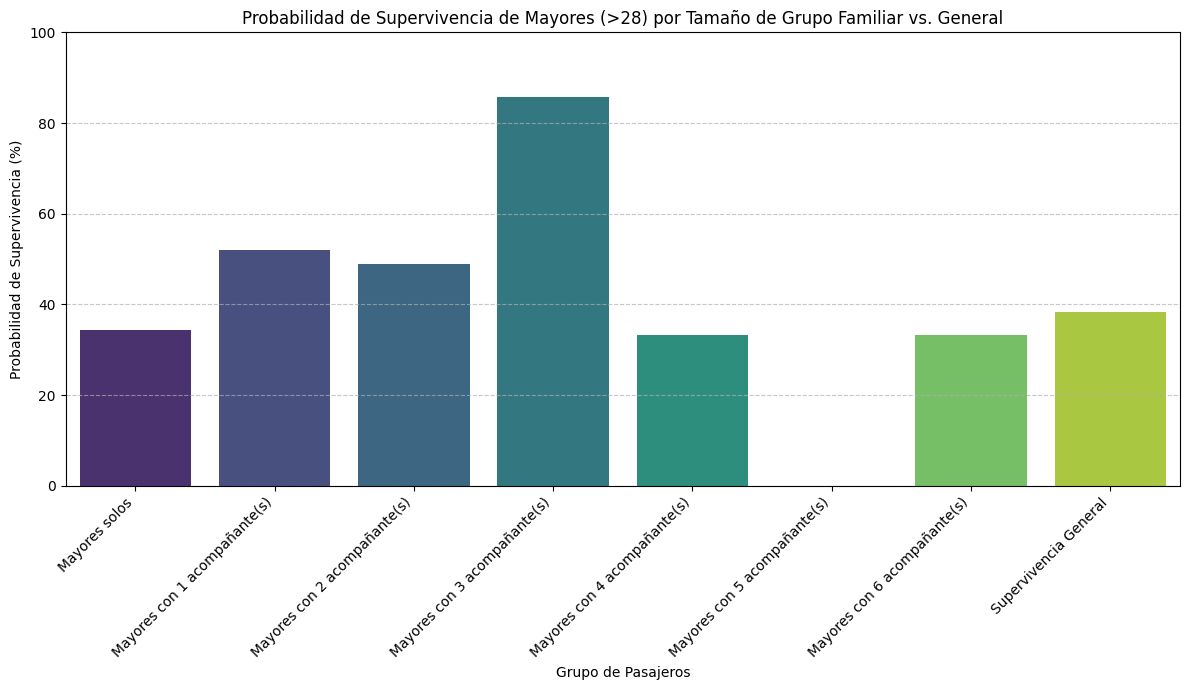

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1

senior_data = titanic[titanic['Age'] > 28]


plot_data = []


prob_solo = senior_data[senior_data['FamilySize'] == 1]['Survived'].mean() * 100
plot_data.append({'Grupo': 'Mayores solos', 'Probabilidad de Supervivencia (%)': prob_solo})


for fs in range(2, 8): # solo las familias de hasta 7 prq despues son outliers y no hay data para todos
    prob_family = senior_data[senior_data['FamilySize'] == fs]['Survived'].mean() * 100
    plot_data.append({'Grupo': f'Mayores con {fs-1} acompañante(s)', 'Probabilidad de Supervivencia (%)': prob_family})


prob_general = titanic['Survived'].mean() * 100
plot_data.append({'Grupo': 'Supervivencia General', 'Probabilidad de Supervivencia (%)': prob_general})


df_plot = pd.DataFrame(plot_data)

# Sort por 'FamilySize'
sorting_order = [f'Mayores solos'] + [f'Mayores con {i} acompañante(s)' for i in range(1, 7)] + ['Supervivencia General']
df_plot['Grupo'] = pd.Categorical(df_plot['Grupo'], categories=sorting_order, ordered=True)
df_plot = df_plot.sort_values('Grupo')

plt.figure(figsize=(12, 7))
sns.barplot(x='Grupo', y='Probabilidad de Supervivencia (%)', data=df_plot, palette='viridis')
plt.title('Probabilidad de Supervivencia de Mayores (>28) por Tamaño de Grupo Familiar vs. General')
plt.xlabel('Grupo de Pasajeros')
plt.ylabel('Probabilidad de Supervivencia (%)')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right') # para que se lea bien
plt.tight_layout()
plt.show()


In [80]:
young_passengers = titanic[titanic['Age'] <= 28]
survival_rate_young = young_passengers['Survived'].mean() * 100

older_passengers = titanic[titanic['Age'] > 28]
survival_rate_older = older_passengers['Survived'].mean() * 100

print(f"Probabilidad de supervivencia para pasajeros <= 28 años: {survival_rate_young:.2f}%")
print(f"Probabilidad de supervivencia para pasajeros > 28 años: {survival_rate_older:.2f}%")



Probabilidad de supervivencia para pasajeros <= 28 años: 40.88%
Probabilidad de supervivencia para pasajeros > 28 años: 40.34%


# Reflexión final

Esta actividad me resultó muy gratificante y pedagógica porque pude aplicar varios conceptos y realmente me empecé a hacer preguntas que valgan la pena para estimlar esta parte de pensamiento crítico de mi cerebro en la resolución de problemas ahora con ciencia de datos. En un comienzo me resultó foranea la base de datos, si me tomo tiempo entender las variables y el gran tamaño, por ejemplo, al inciio intente hacer una analísis sobre la supervivencia y la cabina en la que estaban, pensando que quizá los que estaban en ciertas cabinas más cerca de los botes salvavidas tendrían mejores chances, pero realmente cuando vi que había demasiadas cabinas y muchas sin valores, desisití de esta iniciativa. En general, para mí lo más complicado fue entender la base de datos y luego no revolver las cosas.

Este proceso me gustó porque tuvimos cierta independencia para investigar una cosa que nos llamará a nosotros la atención. COn lo que me quedó no es con las gráficas bonitas o con el .describe(), si no, con las interpretaciones y las maneras que encontramos relacionar eso con el contexto o nuestra sociedad u otras variables. Este proceso de usar los números pero usando estos mismos números para encontrar razones de porque quizá unos sobrevivieron y otros no, me resultó fascinante.